# Jakub Kosterna - praca domowa nr 3

<h1 id="tocheading">Spis treści</h1>
<div id="toc"></div>

In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Przygotowanie podzbiorów do klasyfikacji

## Wczytanie i ogląd

I cyk, kolejny ciekawy zbiór danych! I znowu jakże praktyczny - szczerze powiedziawszy obawiałem się od przedmiotów uczenio-maszynowo-podobnych niekiedy zestawów pierwszych-lepszych czy też dobieranych na siłę byleby tylko pasowały pod dany problem dla studentów, a tu praca w pracę uśmiecham się na samą specyfikację i informacje zawarte w ramce.

Ponadto tym razem wszystko jest już przygotowane - od opisu kolumn, po nawet zajęcie się brakami danych. **Czym mogłoby być piękniej?**

Wpierw wczytam potrzebne pakiety oraz przygotowany plik *.csv*. Jako, że przerobiłem już **kurs uczenia nadzorowanego w Pythonie w pakiecie *sklearn*** (który zresztą bardzo polecam i póki co jest to jeden z najlepszych tam spośród tych za które się wziąłem), przy okazji pracy domowej zamierzam także w dalszym ciągu masterować moją biegłość z ową biblioteką.

In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

Otwórzmy nasz zbiór i upewnijmy się "na szybko", że zaiste wszystko z nim w porządku \[nie żebym nie wierzył\].

In [5]:
df = pd.read_csv('australia.csv')
df.sample(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
27507,14.6,20.3,0.0,7.0,0.0,30.0,9.0,13.0,90.0,71.0,1017.7,1016.0,8.0,8.0,15.7,19.8,0,0
50958,13.3,22.0,0.0,5.0,7.8,57.0,26.0,28.0,39.0,30.0,1000.3,999.2,5.0,6.0,16.9,20.1,0,0
19576,11.1,19.7,0.2,5.4,10.2,33.0,20.0,17.0,67.0,49.0,1021.4,1019.6,7.0,1.0,14.2,18.9,0,0
10079,17.7,19.8,0.6,6.4,0.0,54.0,28.0,26.0,85.0,85.0,1023.9,1022.9,8.0,8.0,18.8,18.6,0,1
3295,13.8,21.9,0.0,4.0,7.6,39.0,9.0,15.0,73.0,24.0,1017.2,1015.7,7.0,2.0,15.8,21.4,0,0
12905,17.0,26.4,0.0,6.4,1.7,31.0,9.0,19.0,47.0,41.0,1017.5,1016.9,7.0,7.0,21.6,24.7,0,0
26603,11.8,16.3,3.0,9.0,6.3,81.0,22.0,26.0,65.0,53.0,1007.3,1011.3,3.0,6.0,13.8,13.7,1,0
49642,7.0,15.4,0.0,2.6,9.5,39.0,7.0,24.0,68.0,58.0,1001.4,1002.7,3.0,6.0,13.2,14.6,0,1
5915,17.7,24.9,0.0,6.2,11.0,39.0,22.0,20.0,57.0,51.0,1020.2,1019.4,1.0,1.0,22.3,22.8,0,0
6712,17.9,22.1,0.0,13.2,10.0,61.0,24.0,19.0,64.0,49.0,1013.1,1012.7,5.0,1.0,18.4,20.5,0,0


## Zmienna celu

Features i target również są podane - chcemy przewidzieć czy następnego dnia będzie padać, więc zmienną celu będzie oczywiście *RainTomorrow*.

In [6]:
X = df.drop(['RainTomorrow'], axis = 1)
y = df[['RainTomorrow']]
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0
56416,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0
56417,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0
56418,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0


## Podział na zbiór testowy i treningowy

... znając funkcję od *sklearn* zostanie on dokonany w jednej linijce.

Przyjmijmy standardowy podział 80% wierszy na trening / 20% na test - bo czemu nie?

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

Na tych czterech podramkach będę pracował już aż do końca - dzięki temu dla każdej z trzech klasyfikacji będę miał podobne wyniki.

Mamy styczność z aż 56 420 wierszami danych w wejściowej data frame - możemy więc wnioskować z Prawa Wielkich Liczb, że nasze klasyfikatory nie powinny stracić na jakości przez "niefortunne" rozlosowanie train-test.

# Modele i ich rezultaty

## k-Nearest Neighbors

Zacznijmy od klasyka, a co.

Naprawdę nie wiem ile najbliższych sąsiadów wybrać - przetestuję więc wiele parametrów i wybiorę najlepszy z nich (wiem że trochę wyprzedzam ale ciekawość by mnie zbytnio zżerała, a jak coś zrobię, to czemu by się nie pochwalić?).

Pomocniczo skorzystam z narzędzia wyszukiwania najlepszego parametru **GridSearchCV** z 5-krotną kroswalidacją.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 10)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train.values.ravel())
knn_cv.best_params_

{'n_neighbors': 9}

Szukając najlepszej wartości parametru *n_neighbors* z pierwszych dziewięć liczb naturalnych, *GridSearchCV* wskazał nam 9. Strzelałem, że może mała liczba w stylu 3 / 4 najlepiej się sprawdzi i tu będzie można zakończyć wyszukiwanie, ale wychodzi na to, że prawdopodobnie będzie to jednak więcej.

Wyszukujmy liniowo wyniki 5-krotnej kroswalidacji dla kolejnej naturalnej liczby sąsiadów od 10 poczynając. Wypisujmy pomocniczo każdy kolejny wynik... aż spotkamy się z sytuacją, że dla pewnej *n_neighbors* wynik dla kolejnych dwóch większych liczb będzie mniejszy. Będzie to oznaczać, że prawdopodobnie skuteczność modelu z każdym kolejnym większym *n_neighbors* będzie już tylko spadać.

In [9]:
from sklearn.model_selection import cross_val_score
knn_scores_by_no_neighbors = []

i = 10
while True:
    knn = KNeighborsClassifier(i)
    cv_scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv = 5)
    mean_score = np.mean(cv_scores)
    print("Wynik dla ", i, " sąsiadów: ", mean_score, sep = "")
    knn_scores_by_no_neighbors.append(mean_score)
    if len(knn_scores_by_no_neighbors) > 3:
        if(knn_scores_by_no_neighbors[-3] > knn_scores_by_no_neighbors[-2] and
           knn_scores_by_no_neighbors[-3] > knn_scores_by_no_neighbors[-1]):
            result = i - 2
            break
    i += 1

print("Najlepszy parametr:", result)

Wynik dla 10 sąsiadów: 0.84805921181957
Wynik dla 11 sąsiadów: 0.8492556176790359
Wynik dla 12 sąsiadów: 0.8491891332353554
Wynik dla 13 sąsiadów: 0.8498759861801883
Wynik dla 14 sąsiadów: 0.8495879441869342
Wynik dla 15 sąsiadów: 0.8503855513653988
Wynik dla 16 sąsiadów: 0.8502969160749917
Wynik dla 17 sąsiadów: 0.8513382439203336
Wynik dla 18 sąsiadów: 0.8502747627741499
Wynik dla 19 sąsiadów: 0.8505628096756352
Najlepszy parametr: 17


Wspaniale, **17**! Urodziłem się 17. dnia miesiąca, więc cieszy mnie ten wynik.

Biorąc pod uwagę pomysł na algorytm prosty ale chyba niegłupi, myślę więc, że możemy 17 najbliższym sąsiadom zaufać. A nawet jeżeli nie jest to najbardziej optymalna wartość - zauważmy, że dla liczby sąsiadów między 10 a 19 mamy stycznośc różnicą wyników *mniejszą niż 0.3%*.

Nauczmy nasz zbiór testowy na liczbie sąsiadów 17 i zobaczmy efekt roboty na zbiorze testowym.

Wygenerujmy także *confusion_matrix* i *classification_report*.

In [10]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train.values.ravel())
y_pred_knn = knn.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[8388  426]
 [1247 1223]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8814
           1       0.74      0.50      0.59      2470

    accuracy                           0.85     11284
   macro avg       0.81      0.72      0.75     11284
weighted avg       0.84      0.85      0.84     11284



Wygenerujmy także krzywą ROC

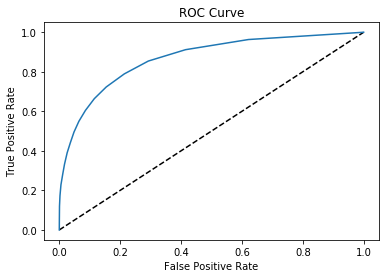

In [11]:
from sklearn.metrics import roc_curve

y_pred_knn_prob = knn.predict_proba(X_test)[:,-1]

fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_knn_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn,tpr_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

... a także wyliczmy AUC.

In [12]:
from sklearn.metrics import roc_auc_score

print("AUC: {}".format(roc_auc_score(y_test, y_pred_knn_prob)))

cv_auc_knn = cross_val_score(knn, X_test, y_test.values.ravel(), cv = 5, scoring = 'roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc_knn))

AUC: 0.8668229325998664
AUC scores computed using 5-fold cross-validation: [0.85596586 0.86208409 0.85329168 0.87678345 0.85777112]


Myślę, że możemy czuć się mocno usatysfakcjonowani.

Miernie wypadła właściwie tylko miara *recall* dla 1 - oznacza to, że mimo generalnie bardzo dobrego przewidywania w przypadku dni gdy deszcz nie spadł, tylko w połowie przypadków kiedy opady nastały zostały skutecznie przewidziane.

Wyborne mamy za to wynik wszystkich miar dla braku deszczu - czyli jeżeli model zakładał że opadów brak, to niemalże zawsze miał rację.

## Decision Tree Classifier

Odczuwam jakąś taką mocną sympatię do tego modelu mimo że wiem, że doskonały nie jest. Tak czy inaczej zajmę się nim w drugiej kolejności.

Tym razem będę chciał wziąć pod uwagę więcej hiperparametrów - aby nie czekać na w miarę dobry rezultat godzinami, tym razem skorzystam z narzędzia **RandomizedSearchCV**.

Owemu narzędziu pozwolę wylosować legitne wartości dla trzech hiperparametrów:

1. *criterion* - „gini” / „entropia” - kryterium obliczenia przyrostu informacji
2. *max_depth* - maksymalna głębokość drzewa. Dla *None* - nie ma ograniczenia
3. *max_feautures* - największa liczba kolumn brana pod uwagę

In [13]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": np.append(np.arange(1, 26), None),
              "max_features": np.arange(4, 18),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(tree, param_dist, cv=10)

tree_cv.fit(X_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_features': 11, 'max_depth': 5, 'criterion': 'gini'}
Best score is 0.8437391473124312


Powyższe strojenie hiperparametrów również nie jest doskonałe - sprawdziłem tylko trzy pierwsze-lepsze atrybuty zaoferowane przez *DecisionTreeClassifier*, podczas gdy jest ich o wiele więcej.

No ale dobra, wiemy już jakie parametry są w miarę spoko. Zobaczmy efekt działania funkcji dla nich na naszym zbiorze testowym, a także jak prezentuje się confusion matrix.

In [14]:
y_pred_tree = tree_cv.predict(X_test)

print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[8413  401]
 [1346 1124]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      8814
           1       0.74      0.46      0.56      2470

    accuracy                           0.85     11284
   macro avg       0.80      0.70      0.73     11284
weighted avg       0.83      0.85      0.83     11284



Wygenerujmy także krzywą ROC

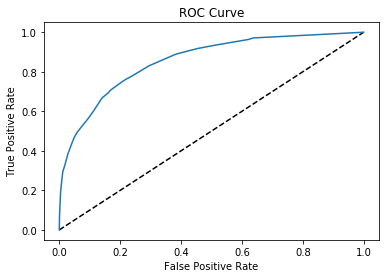

In [15]:
y_pred_tree_prob = tree_cv.predict_proba(X_test)[:,-1]

fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_pred_tree_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_tree,tpr_tree)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

No i cyk miara AUC.

In [16]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_tree_prob)))

cv_auc_tree = cross_val_score(tree_cv, X_test, y_test.values.ravel(), cv = 5, scoring = 'roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc_tree))

AUC: 0.8555763328308201
AUC scores computed using 5-fold cross-validation: [0.83081034 0.83506445 0.84087381 0.83211011 0.81633231]


Niesamowite, ale k-Nearest Neighbors i Decision Tree **poradziły sobie bardzo podobnie**.

Dla szacowań dni bez deszczu **miary są takie same, jedynie dla precision dla dni z opadami DTC minimalnie przegrywa** - a dokładniej dwoma punktami procentowymi (74% > 72%).

Także patrząc na konkretne liczby *confusion matrix* wartości są bardzo zbliżone - jedynie rzuca się w oczy trochę większa ilość FN dla modelu drzewa decyzyjnego - oznacza to, że minimalnie częściej był przewidywany deszcz, którego jednak nie było (stąd też troszkę gorsze *precision*).

Można więc wnioskować, że wybór modelu spośród tych dwóch niemalże nie wpływa na rezultat przewidywania czy następnego dnia w Australii będzie padać.

## Logistic Regression

Dopiero zaczynam moją przygodę z uczeniem maszynowym, a w owym datasecie mamy styczność z klasyfikacją binarną - grzechem byłoby nie przećwiczyć klasycznej regresji logistycznej! Pobawiłem się już nieco z prostym hyperparameter tuning, tym razem użyję najprostszej funkcji bez żadnego wydziwiania.

Ustawię jedynie maksymalną ilość iteracji na 1000.

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train.values.ravel())

y_pred_log = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[8356  458]
 [1188 1282]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8814
           1       0.74      0.52      0.61      2470

    accuracy                           0.85     11284
   macro avg       0.81      0.73      0.76     11284
weighted avg       0.85      0.85      0.84     11284



Zobaczmy także krzywą ROC.

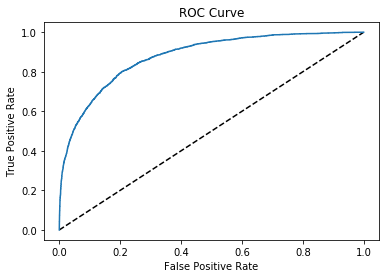

In [18]:
y_pred_logreg_prob = logreg.predict_proba(X_test)[:,-1]

fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test, y_pred_logreg_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logreg,tpr_logreg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Na koniec jeszcze miara AUC.

In [19]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_logreg_prob)))

AUC: 0.8785444852640582


## Porównanie i podsumowanie

Niesamowite jak podobne efekty dały te trzy modele. Zwłaszcza wydawałoby się z totalnie innego świata *k-Nearest Neighbors* i *Decision tree* - ich miary wyniosły niemalże tyle samo, przy najbardziej ogólnym AUC równym kolejno **86,7%** i **86,4%**.

Mimo strojenia hiperparametrów dla dwóch pierwszych, **najlepsza okazała się jednak regresja logistyczna z AUC = 87,9%**. Także dla każdej innej miary efekt *Logistic regression* był taki sam co do procenta lub troszkę lepszy. Porównajmy jeszcze krzywe ROC.

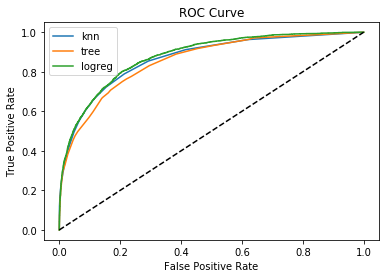

In [20]:
plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_logreg, tpr_logreg)
plt.plot([0, 1], [0, 1], 'k--')

plt.legend(['knn', 'tree', 'logreg'])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Także i owe krzywe potwierdzają, że rezultat jest bardzo zbliżony.

Choć można odczytać, że **decision tree lekko odstaje**, a **logreg faktycznie jest nieco lepszy od pozostałych dwóch**, to wciąż **krzywe wyglądają niemalże tak samo**.

Najlepsza miara? Biorąc pod uwagę złożoność problemu, myślę, że najbardziej reprezentatywna w tym wypadku jest **AUC** - i faktycznie przynajmniej dla tych trzech modeli na swój sposób "uśrednia" wyniki miar pozostałych.

# Zadanie bonusowe

### Wczytanie i ogląd

Przyznam, że jakoś sprawniej mi poszło niż z zadaniem z *encodingiem*, a u mnie na zegarku dopiero 13:33 w piątek po wykładzie. Nie mówiąc już o tym że mimo że jestem absolutnie świadomy owego bez sensu, jestem jedną z tych osób, która semestr w semestr od 4. klasy podstawówki walczy o jak najlepszą średnią. Mam trochę czasu do niedzieli wieczór - tak więc zbiorze *Allegro*, powracaj!!

In [63]:
allegro = pd.read_csv("allegro-api-transactions.csv")
allegro.sample(10)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
419435,419435,2016-04-03 11:31:41,6061167407,"['Odzież, Obuwie, Dodatki', 'Odzież damska', '...",1,1,frikoooo,29.00,1,927,0,115968,Koszalin,"Odzież, Obuwie, Dodatki"
318910,318910,2016-04-03 09:15:15,5715818016,"['Dla Dzieci', 'Odzież', 'Pozostała odzież', '...",1,1,PelnaTorba,9.90,1,837,0,2836,Bolesław,Dla Dzieci
395764,395764,2016-04-03 23:24:59,5166982426,"['Dom i Ogród', 'Utrzymanie czystości', 'Prepa...",1,1,niemchem_com,13.00,1,717,0,52819,SZEWCE,Dom i Ogród
190023,190023,2016-04-03 11:57:25,5803978410,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Nasiona',...",1,1,swiatnasion,2.99,1,521,0,12496,Łódź,Dom i Ogród
64956,64956,2016-04-03 14:07:20,6094472189,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Twarz', ...",1,1,verbenazdrowie,19.90,1,1,0,1372,Kalisz,Uroda
304465,304465,2016-04-03 20:11:08,5771570655,"['Telefony i Akcesoria', 'Akcesoria GSM', 'Fol...",1,1,Smart-Tel,14.99,1,849,0,4980,Koszalin,Telefony i Akcesoria
225726,225726,2016-04-03 12:43:27,5729268245,"['RTV i AGD', 'Kamery', 'Akcesoria']",1,1,Alopl,16.90,0,119,0,8674,Polska,RTV i AGD
72183,72183,2016-04-03 18:25:37,5780747893,"['Sport i Turystyka', 'Rowery i akcesoria', 'C...",1,1,sporti-pl,27.90,1,56,0,21633,Rzeszów,Sport i Turystyka
85110,85110,2016-04-03 10:24:13,5909962971,"['Dom i Ogród', 'Zwierzęta', 'Dla kotów', 'Grz...",1,1,isosklep,11.85,0,33,0,87565,Legnica,Dom i Ogród
210454,210454,2016-04-03 22:30:31,6098591545,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Drzewa i ...",1,1,farmerm12,6.00,0,16,0,1138,Czaniec,Dom i Ogród


Które kolumny wezmę pod uwagę, a które nie?

* *lp* nie z oczywistego powodu,
* *date* może się przydać - przekonwertuję daty i godziny do integera. Zapewne z czasem zmieniają się trendy.

In [64]:
from datetime import datetime

newDate = [0] * len(allegro["date"])
for i in range(len(allegro["date"])):
    newOne = datetime.strptime(allegro["date"][i], "%Y-%m-%d %H:%M:%S")
    newOne = int(newOne.timestamp())
    newDate[i] = newOne

Zobaczmy czy na pewno wszystko poszło zgodnie z planem.

In [65]:
from random import sample
sample(newDate, 10)

[1459707430,
 1459716042,
 1459711106,
 1459677301,
 1459717712,
 1459707254,
 1459686821,
 1459691817,
 1459708241,
 1459637940]

No i bueno!

Zastąpmy kolumnę *date* w naszej wejściowej dataframe tą nowo-powstałą.

In [66]:
allegro[["date"]] = newDate

In [25]:
allegro.sample(10)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
172713,172713,1459697884,5329316158,"['Sport i Turystyka', 'Siłownia i fitness', 'O...",1,1,MASTER_CLUB,27.40,1,934,0,14783,Głogów Małopolski,Sport i Turystyka
187403,187403,1459715865,5182571159,"['RTV i AGD', 'Elektronika', 'Kable, przewody'...",1,1,elkapol,11.56,1,13,0,3244,Marianów,RTV i AGD
328953,328953,1459707774,5328664043,"['Telefony i Akcesoria', 'Akcesoria GSM', 'Pok...",1,1,brick_pl,72.90,1,999,0,32650,Warszawa,Telefony i Akcesoria
205539,205539,1459715695,6058566543,"['Motoryzacja', 'Części samochodowe', 'Koła, f...",1,1,Oponeo_pl_SA,440.00,1,3,0,4706,Bydgoszcz,Motoryzacja
175563,175563,1459718481,5966662361,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Bulwy, ce...",1,1,www_e-iglaki_pl,3.31,1,99991,0,2588,Wałcz Białogard Police Szczecinek,Dom i Ogród
81069,81069,1459640570,5978739569,"['Biżuteria i Zegarki', 'Biżuteria męska', 'Br...",1,1,leather-gifts,24.99,0,1,0,699,KRAKÓW,Biżuteria i Zegarki
323425,323425,1459704582,5877152638,"['Delikatesy', 'Kawy', 'Kawy ziarniste']",1,1,bdsklep_pl,39.99,1,85,0,87226,Białystok,Delikatesy
49903,49903,1459670423,6094916084,"['Motoryzacja', 'Części do innych pojazdów', '...",1,1,czesci_kubix_pl,25.99,1,14,0,9742,Olsztyn,Motoryzacja
9992,9992,1459689913,6014376794,"['Dom i Ogród', 'Zwierzęta', 'Dla gryzoni i kr...",1,1,Allezoo,7.80,1,457,0,45196,Inowrocław,Dom i Ogród
43564,43564,1459707474,6099329483,"['Motoryzacja', 'Akcesoria samochodowe', 'Gadż...",1,1,eFOX24,21.90,0,0,0,30781,Kraków,Motoryzacja


... Idąc dalej:

* *item_id* - zdecydowanie nieprzydatne,
* *categories* - tutaj można by z każdej listy kategorii wyjąć podane i na przykład za pomocą dodatkowych binarnych kolumn na każdą odznaczać czy dany produkt jest w konkretnej, ale zajęłoby to trochę roboty i nie jest to chyba cel tego ćwiczenia,
* *pay_option_on_delivery* - jak najbardziej,
* *pay_option_transfer* - j. w.,
* *seller* - z pewnością w praktyce okazało by się, że jedni użytkownicy stosunkowo wydają droższe produkty, a inni tańsze, ale kategorii jest tu jednak za dużo - żaden model nie brałby pod uwagę tej kolumny w przypadku featura na każdego użytkownika \[zresztą o zgrozo! Ile by tego wyszło, już nie mówiąc o czasie pamięci by zabrakło\],
* *price* - no, to właśnie będzie nasza zmienna celu,
* *it_is_allegro_standard* - bez wątpienia się przyda i jest już w fajnej formie,
* *it_quantity* - bierzemy!
* *it_is_brand_zone* - to też,
* *it_seller_rating* - i to również.

Do przekminienia zostały jeszcze feautures *it_location* i *main_category* - te zdecydowanie weźmiemy pod uwagę, ale idąc śladem pd2, zastosujemy encoding.

Sensowne wydawało się zakodowanie *it_location* za pomocą target encoding, toteż powtórzymy tamtą operację. Zanim jednak - przyjrzyjmy się owej kolumnie. Można by jeszcze z nią zrobić coś sensownego?

In [67]:
allegro[["it_location"]].groupby('it_location').size().reset_index()

,it_location,0
0,"\tWarszawa,Wrocław,Częstochowa",5
1,*,1
2,Dzierżoniów,1
3,WARSZAWA JANKI,2
4,- Ząbki koło Warszawy,1
...,...,...
10051,żyrardów,13
10052,żyrardów / jaktorów,1
10053,żyrzyn,1
10054,żywiec,4


No tak średnio bym powiedział, tak średnio. Jak widać kolumna "miasto" została wpisywana ręcznie i biorąc pod uwagę liczbę małych miasteczek i różne formaty wpisania, na wejściowe +420 tys. obserwacji zyskaliśmy po nad 10 000 unikalnych miast. Czy możemy coż z tym zrobić? Jakoś poprawić na pewno, ale to już temat na inną pracę. Tak czy inaczej na pewno nie zaszkodzi konwersja wszystkich znaków na małe - w ten sposób chociażby 'Warszawa' == 'warszawa', co poprawi wynik.

In [68]:
allegro["it_location"] = allegro["it_location"].str.lower()
allegro[["it_location"]].groupby('it_location').size().reset_index()

,it_location,0
0,"\twarszawa,wrocław,częstochowa",5
1,*,1
2,dzierżoniów,1
3,warszawa janki,2
4,- ząbki koło warszawy,1
...,...,...
7898,żywiec- bielsko-katowice-gliwice,1
7899,żórawina,52
7900,żółkiewka,10
7901,żędowice,41


No i troszkę lepiej! Po nad 20% mniej miast, a jednak tyle samo.

Dokonajmy **target encodingu**.

In [69]:
import category_encoders
te = category_encoders.target_encoder.TargetEncoder(allegro)

encoded = te.fit_transform(allegro['it_location'], allegro['price'])
encoded.sample(10)

,it_location
327403,28.735015
25187,11.017045
337884,78.691148
46709,20.705669
171259,42.415794
217221,168.657143
246825,91.571158
271449,74.661685
405746,24.816207
354385,8.865926


In [70]:
allegro['it_location'] = encoded

Bajerancko. Słuchając polecenia, *main_category* będziemy już kodować na trzy różne sposoby - ale wpierw odchudźmy naszą dataframe o kolumny, które nie będą nam potrzebne.

In [71]:
allegro = allegro.drop(columns = ['lp', 'item_id', 'categories', 'seller'])

In [73]:
allegro.sample(10)

,date,pay_option_on_delivery,pay_option_transfer,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
282455,1459699319,1,1,18.98,1,9966,0,4240,23.982727,Delikatesy
182604,1459672986,1,1,119.00,1,7,0,585,68.023919,Dom i Ogród
351329,1459718019,1,1,299.99,1,44,0,30858,67.373536,Dla Dzieci
358923,1459716298,1,1,22.70,0,14,0,325,139.750937,Zdrowie
369199,1459701023,1,1,6.11,1,756,0,80911,47.309134,Dla Dzieci
67888,1459672068,1,1,18.00,0,17,0,14330,40.861363,Telefony i Akcesoria
322342,1459696226,0,1,19.50,0,0,0,1415,79.973929,Dom i Ogród
342975,1459686225,1,0,94.00,0,0,0,532,76.811350,Uroda
391332,1459680743,1,1,35.00,0,0,0,1767,104.254805,Dla Dzieci
1581,1459672027,1,1,24.95,1,8,0,18133,48.498276,RTV i AGD


No i cyk same ładne liczby. Z wyjątkiem *main_category*... Stwórzmy trzy nowe ramki, każda odpowiadająca za jeden z wybranych ostatnio encodingów.

#### One-hot encoding

In [80]:
values = np.array(allegro[["main_category"]])

from sklearn.preprocessing import LabelEncoder

# integer encode
le = LabelEncoder()
integer_encoded = le.fit_transform(values)
print(integer_encoded)

#invert
print(le.inverse_transform(integer_encoded))

[12 18  6 ... 18  5 15]
['Komputery' 'Odzież, Obuwie, Dodatki' 'Dom i Ogród' ...
 'Odzież, Obuwie, Dodatki' 'Dla Dzieci' 'Motoryzacja']


In [82]:
category_series = pd.concat([pd.DataFrame(integer_encoded), pd.DataFrame(le.inverse_transform(integer_encoded))], axis = 1)
category_series = category_series.drop_duplicates()
category_series.columns = ["Index", "Category"]
category_series = category_series.sort_values("Index")
category_series

,Index,Category
1940,0,Antyki i Sztuka
6533,1,Bilety
406,2,Biuro i Reklama
7,3,Biżuteria i Zegarki
48,4,Delikatesy
22,5,Dla Dzieci
2,6,Dom i Ogród
151,7,Filmy
249,8,Fotografia
59,9,Gry


In [83]:
from sklearn.preprocessing import OneHotEncoder

# one hot encode
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert 
inverted = onehot_encoder.inverse_transform(onehot_encoded)
print(inverted.transpose())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[12 18  6 ... 18  5 15]]


In [84]:
onehot_encoded = pd.DataFrame(onehot_encoded)
onehot_encoded.columns = category_series["Category"]
onehot_encoded

Category,Antyki i Sztuka,Bilety,Biuro i Reklama,Biżuteria i Zegarki,Delikatesy,Dla Dzieci,Dom i Ogród,Filmy,Fotografia,Gry,...,Nieruchomości,"Odzież, Obuwie, Dodatki",Przemysł,RTV i AGD,Rękodzieło,Sport i Turystyka,"Sprzęt estradowy, studyjny i DJ-ski",Telefony i Akcesoria,Uroda,Zdrowie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
420016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
420017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420018,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
allegro_onehot = pd.concat([allegro, onehot_encoded], axis = 1).drop(columns = 'main_category')
allegro_onehot.sample(10)

,date,pay_option_on_delivery,pay_option_transfer,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,Antyki i Sztuka,...,Nieruchomości,"Odzież, Obuwie, Dodatki",Przemysł,RTV i AGD,Rękodzieło,Sport i Turystyka,"Sprzęt estradowy, studyjny i DJ-ski",Telefony i Akcesoria,Uroda,Zdrowie
119625,1459691626,1,1,29.37,1,52,0,10379,48.077553,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144506,1459709312,1,1,24.00,1,19,0,14329,47.309134,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
367677,1459693191,1,1,47.99,0,3,0,1825,73.772916,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198929,1459697219,1,1,99.00,1,775,0,154216,73.772916,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2651,1459695519,1,1,129.00,1,99788,0,61974,84.361624,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92452,1459698109,1,1,122.00,1,237,0,6828,116.414706,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
395026,1459694761,1,1,78.00,1,148,0,45099,84.111356,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166840,1459641591,1,1,29.00,0,99221,0,72892,48.077553,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
175053,1459702845,1,1,15.35,1,13,0,26950,84.132898,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392176,1459699225,1,1,13.50,1,12,0,13305,72.328215,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Binary encoding

In [94]:
bin_e = category_encoders.BinaryEncoder(cols = ['main_category'])
allegro_binary = bin_e.fit_transform(allegro)
allegro_binary

,date,pay_option_on_delivery,pay_option_transfer,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,1459711268,1,1,59.99,1,997,0,50177,84.132898,0,0,0,0,0,1
1,1459690526,1,1,4.90,1,9288,0,12428,84.132898,0,0,0,0,1,0
2,1459685671,1,1,109.90,1,895,0,7389,64.883187,0,0,0,0,1,1
3,1459706144,1,1,18.50,0,971,0,15006,35.433365,0,0,0,1,0,0
4,1459699554,1,1,19.90,1,950,0,32975,73.772916,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,1459708033,0,0,180.00,0,0,0,176,26.346402,0,0,0,1,1,0
420016,1459715702,1,1,14.99,1,2,0,34851,63.645927,0,0,1,0,0,1
420017,1459715937,1,1,5.99,1,470,0,983,18.682800,0,0,0,0,1,0
420018,1459716257,1,0,200.00,0,0,0,163,104.254805,0,0,1,0,0,0


Ależ satysfakcjonująco wąski ten binary encoding!

#### Polynomial encoding

In [96]:
pe = category_encoders.PolynomialEncoder(cols = ['main_category'])
allegro_polynomial = pe.fit_transform(allegro)
allegro_polynomial

,intercept,date,pay_option_on_delivery,pay_option_transfer,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,...,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25
0,1,1459711268,1,1,59.99,1,997,0,50177,84.132898,...,-0.002429,0.001117,-0.000478,0.000189,-0.000069,0.000022,-0.000006,0.000002,-3.206860e-07,4.490498e-08
1,1,1459690526,1,1,4.90,1,9288,0,12428,84.132898,...,0.026161,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696464e-06,-1.167529e-06
2,1,1459685671,1,1,109.90,1,895,0,7389,64.883187,...,-0.119078,0.071643,-0.039341,0.019631,-0.008835,0.003543,-0.001243,0.000370,-8.818865e-05,1.459412e-05
3,1,1459706144,1,1,18.50,0,971,0,15006,35.433365,...,0.286143,-0.209481,0.136451,-0.079261,0.040921,-0.018611,0.007334,-0.002432,6.413720e-04,-1.167530e-04
4,1,1459699554,1,1,19.90,1,950,0,32975,73.772916,...,0.026161,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696464e-06,-1.167529e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,1,1459708033,0,0,180.00,0,0,0,176,26.346402,...,0.090137,-0.269274,0.354461,-0.340354,0.262732,-0.167967,0.089180,-0.038617,1.298137e-02,-2.953850e-03
420016,1,1459715702,1,1,14.99,1,2,0,34851,63.645927,...,-0.219915,-0.021544,0.253169,-0.256279,0.031345,0.237827,-0.370952,0.327745,-1.926922e-01,7.015395e-02
420017,1,1459715937,1,1,5.99,1,470,0,983,18.682800,...,0.026161,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696464e-06,-1.167529e-06
420018,1,1459716257,1,0,200.00,0,0,0,163,104.254805,...,-0.153735,0.284881,-0.195003,-0.043363,0.269735,-0.366463,0.323213,-0.207995,9.736026e-02,-2.953850e-02


### Podział na cechy i zmienne celu

Jak wskazuje treść, targetem będzie *price*.

In [97]:
Xa = allegro.drop(['price'], axis = 1)
ya = allegro[['price']]
Xa

,date,pay_option_on_delivery,pay_option_transfer,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,1459711268,1,1,1,997,0,50177,84.132898,Komputery
1,1459690526,1,1,1,9288,0,12428,84.132898,"Odzież, Obuwie, Dodatki"
2,1459685671,1,1,1,895,0,7389,64.883187,Dom i Ogród
3,1459706144,1,1,0,971,0,15006,35.433365,Książki i Komiksy
4,1459699554,1,1,1,950,0,32975,73.772916,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...
420015,1459708033,0,0,0,0,0,176,26.346402,RTV i AGD
420016,1459715702,1,1,1,2,0,34851,63.645927,Uroda
420017,1459715937,1,1,1,470,0,983,18.682800,"Odzież, Obuwie, Dodatki"
420018,1459716257,1,0,0,0,0,163,104.254805,Dla Dzieci


In [98]:
Xa_onehot = allegro_onehot.drop(['price'], axis = 1)
ya_onehot = allegro_onehot[['price']]
Xa_binary = allegro_binary.drop(['price'], axis = 1)
ya_binary = allegro_binary[['price']]
Xa_polynomial = allegro_polynomial.drop(['price'], axis = 1)
ya_polynomial = allegro_polynomial[['price']]

### Podział na zbiór testowy i treningowy

... to w tym wypadku, no i w sumie jak niemalże w każdym na tym etapie zaawansowania raczej formalność - ponieważ danych jest dużo, ale także i spora ilość unikalnych miast, pozwolę sobie na proporcję 9 / 1 wierszy w zbiorze treningowym w stosunku do testowego.

In [99]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size = 0.1, random_state = 6)
Xa_onehot_train, Xa_onehot_test, ya_onehot_train, ya_onehot_test = train_test_split(Xa_onehot, ya_onehot, test_size = 0.1, random_state = 6)
Xa_binary_train, Xa_binary_test, ya_binary_train, ya_binary_test = train_test_split(Xa_binary, ya_binary, test_size = 0.1, random_state = 6)
Xa_polynomial_train, Xa_polynomial_test, ya_polynomial_train, ya_polynomial_test = train_test_split(Xa_polynomial, ya_polynomial, test_size = 0.1, random_state = 6)

### Algorytm uczenia maszynowego - Ridge

Jak czytamy w kursie uczenia nadzorowanego w Pythonie ze *skirit-learn*:

*Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.*

Tak więc jak mi radzą nie wezmę się za Lasso, a właśnie za algorytm Ridge.

In [106]:
ya_onehot_train

,price
283393,9.90
246414,199.99
292617,247.00
164890,58.70
127377,979.00
...,...
266858,57.00
239572,9.99
303331,49.99
379593,8.00


In [118]:
from sklearn.linear_model import RidgeClassifier

clf_onehot = RidgeClassifier()
clf_onehot.fit(np.array(Xa_onehot_train).astype(int), np.array(ya_onehot_train).astype(int))
yA_onehot_predicted = clf_onehot.predict(Xa_onehot_test)

rms = sqrt(mean_squared_error(yA_onehot_test, yA_onehot_predicted))
rms

MemoryError: Unable to allocate 4.49 GiB for an array with shape (378018, 1593) and data type int64

A to pech, **MemoryError**! A niech to, muszę wziąć lżejszy zbiór treningowy...

In [222]:
sample_indexes = sample(list(range(1,378019)), 100000)

In [223]:
sample_indexes[1:10]

[219238, 132166, 248077, 2660, 1196, 116195, 221985, 115978, 152880]

In [228]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

clf_onehot = RidgeClassifier()
clf_onehot.fit(np.array(Xa_onehot_train.iloc[sample_indexes, :]).astype(int),
               np.array(ya_onehot_train.iloc[sample_indexes, :]).astype(int).ravel())
ya_onehot_predicted = clf_onehot.predict(Xa_onehot_test)

rms = sqrt(mean_squared_error(ya_onehot_test, ya_onehot_predicted))
print("RMS dla One Hot:", rms)
coefficient_of_dermination = r2_score(ya_onehot_test, ya_onehot_predicted)
print("R2 dla One Hot:", coefficient_of_dermination)

RMS dla One Hot: 395.5222237041871
R2 dla One Hot: -0.02090979771483492


In [230]:
clf_binary = RidgeClassifier()
clf_binary.fit(np.array(Xa_binary_train.iloc[sample_indexes, :]).astype(int),
               np.array(ya_binary_train.iloc[sample_indexes, :]).astype(int).ravel())
ya_binary_predicted = clf_binary.predict(Xa_binary_test)

rms = sqrt(mean_squared_error(ya_binary_test, ya_binary_predicted))
print("RMS dla Binary:", rms)
coefficient_of_dermination = r2_score(ya_binary_test, ya_binary_predicted)
print("R2 dla One Hot:", coefficient_of_dermination)

RMS dla Binary: 395.4962972230697
R2 dla One Hot: -0.020775960830339057


In [229]:
clf_polynomial = RidgeClassifier()
clf_polynomial.fit(np.array(Xa_polynomial_train.iloc[sample_indexes, :]).astype(int),
               np.array(ya_polynomial_train.iloc[sample_indexes, :]).astype(int).ravel())
ya_polynomial_predicted = clf_polynomial.predict(Xa_polynomial_test)

rms = sqrt(mean_squared_error(ya_polynomial_test, ya_polynomial_predicted))
print("RMS dla Polynomial:", rms)
coefficient_of_dermination = r2_score(ya_polynomial_test, ya_polynomial_predicted)
print("R2 dla One Hot:", coefficient_of_dermination)

RMS dla Polynomial: 396.3724112385952
R2 dla One Hot: -0.025303470639291836


**Szok i niedowierzanie!!**

Co do porównania wartości, wyniki wyszły totalnie odwrotnie w stosunku do tego, czego się spodziewałem - patrząc na średnią kwadratową **najbardziej złożone kodowanie wielomianowe dało najgorszy wynik, zaś binary - najlepszy**. Należy jednak zauważyć, że we wszystkich trzech przypadkach wynik wyszedł niemalże taki sam - wartości wahają się między 395.5 a 396.4 - czyli mniej niż 1!! Zapewne dla inaczej wylosowanych danych treningowych i testowych (a także olanych ze względu na *MemoryError*) sytuacja mogłaby się odwrócić. Patrząc na RMS możnaby więc zaryzykować stwierdzeniem, że **wybór kodowania nie ma wpływu na działanie *RidgeClassifier()***.

Podobnie w kwestii współczynnika determinacji wyniki są bardzo zbliżone, ale z tym samym "rankingiem" co do bardzo małej różnicy.

Podsumowując, dla naszego zbioru danych **nie było dużego znaczenia jakiego użyliśmy encodingu** - zarówno *one-hot*, *binary* i *polynomial* dały bardzo podobne wyniki.